# **Import Libraries**

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# **Load and Prepare Data**

In [144]:
data_train=pd.read_csv("fraudTrain.csv")
data_test=pd.read_csv("fraudTest.csv")

In [145]:
full_data=pd.concat([data_train, data_test])

In [146]:
full_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [147]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388837 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1388837 non-null  int64  
 1   trans_date_trans_time  1388837 non-null  object 
 2   cc_num                 1388837 non-null  int64  
 3   merchant               1388837 non-null  object 
 4   category               1388837 non-null  object 
 5   amt                    1388837 non-null  float64
 6   first                  1388837 non-null  object 
 7   last                   1388837 non-null  object 
 8   gender                 1388837 non-null  object 
 9   street                 1388837 non-null  object 
 10  city                   1388837 non-null  object 
 11  state                  1388837 non-null  object 
 12  zip                    1388837 non-null  int64  
 13  lat                    1388837 non-null  float64
 14  long                   1

In [148]:
full_data=full_data.dropna()

In [149]:
full_data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


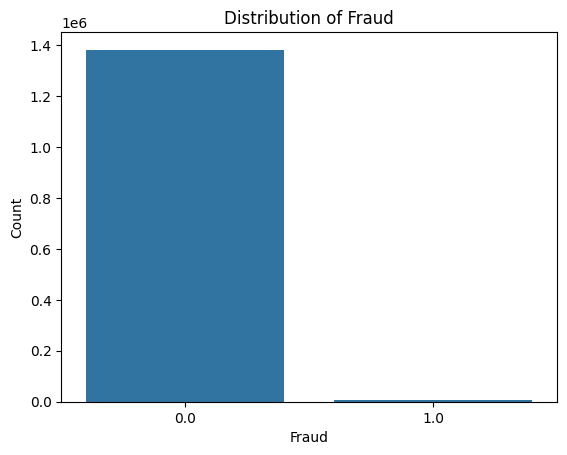

In [150]:
fraud_counts=full_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [151]:
full_data.duplicated().sum()

0

In [152]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388836 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1388836 non-null  int64  
 1   trans_date_trans_time  1388836 non-null  object 
 2   cc_num                 1388836 non-null  int64  
 3   merchant               1388836 non-null  object 
 4   category               1388836 non-null  object 
 5   amt                    1388836 non-null  float64
 6   first                  1388836 non-null  object 
 7   last                   1388836 non-null  object 
 8   gender                 1388836 non-null  object 
 9   street                 1388836 non-null  object 
 10  city                   1388836 non-null  object 
 11  state                  1388836 non-null  object 
 12  zip                    1388836 non-null  int64  
 13  lat                    1388836 non-null  float64
 14  long                   1

# **Data Processing**

In [153]:
fraud=full_data[full_data["is_fraud"]==1]
not_fraud=full_data[full_data["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

6954
1381882


In [154]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

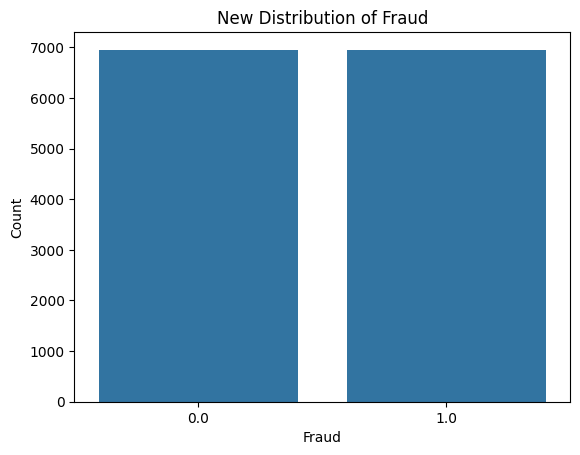

In [155]:
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

# **Feature Engineering**

In [156]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13908 entries, 2449 to 89432
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  13908 non-null  object 
 1   cc_num                 13908 non-null  int64  
 2   category               13908 non-null  object 
 3   amt                    13908 non-null  float64
 4   zip                    13908 non-null  int64  
 5   lat                    13908 non-null  float64
 6   long                   13908 non-null  float64
 7   city_pop               13908 non-null  int64  
 8   merch_lat              13908 non-null  float64
 9   merch_long             13908 non-null  float64
 10  is_fraud               13908 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.3+ MB


In [158]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

# **Encode Variables**


In [159]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [160]:
data.head()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
2449,123,4,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1.0,2,1,2019,1,6
2472,307,2,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1.0,2,1,2019,1,47
2523,307,4,276.31,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1.0,2,1,2019,3,5
2546,123,2,7.03,28611,35.9946,-81.7266,885,35.909292,-82.091010,1.0,2,1,2019,3,38
2553,307,4,275.73,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1.0,2,1,2019,3,55


# **Feature** **Scaling**

In [161]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [162]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

# **Split the** **Data**


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# **Build and Train the Model**

In [164]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

# **Evaluate** **the** **Model**


In [165]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9611790079079798
Precision: 0.9621942179392142
Recall: 0.9579335793357934
F1 score: 0.9600591715976331
Confusion matrix: [[1376   51]
 [  57 1298]]


Text(0.5, 1.0, 'Confusion Matrix')

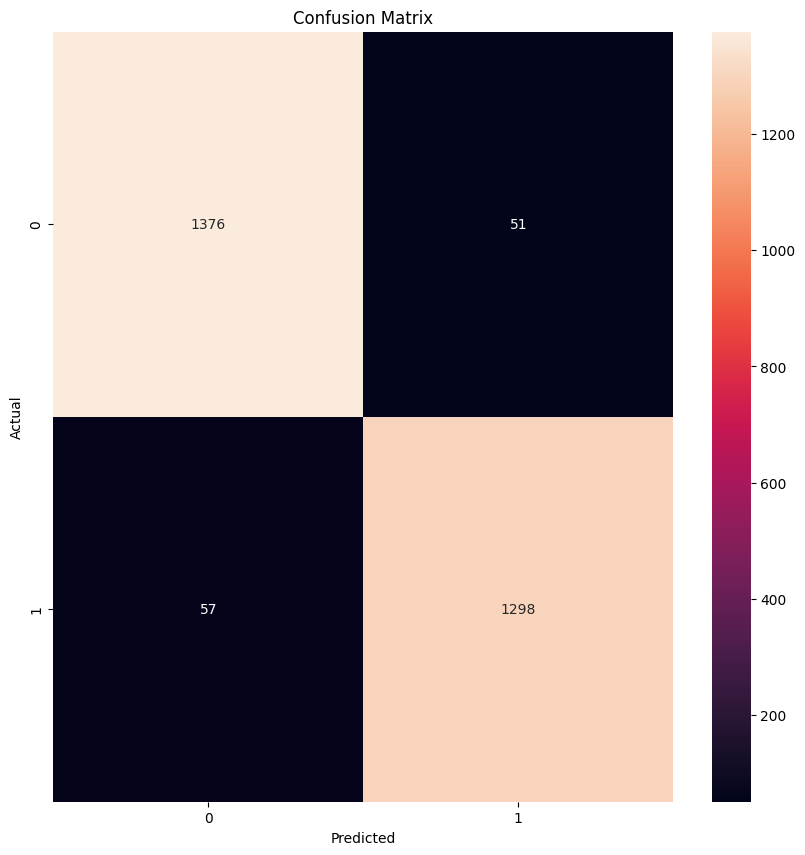

In [166]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')